
# Mehshing & Binning

In this notebook, we shall divide the original image into a mesh of N x N by 

1. Resizing the image into a Square Image.

2. Creating $N^2$ partitions and computing the mean color specification of each bin/partition.

In [147]:
# Import the necessary libraries

%load_ext autoreload
%autoreload 2

import os, json
import PIL.Image
PIL.Image.MAX_IMAGE_PIXELS = None
import numpy as np

import sys
sys.path.append("../scripts")
from analyse import *
from center_crop import *
from distance import *
from image_congregation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
# Define the source image and it's destination dimensions
src_image_pth = "../../Photomosaic_Data/src.jpg"
src_dimension = 18000
individual_files_dimension = 250

In [149]:
def preprocess_image(image_path, IMSIZE = 250, w = 256):
    # Open the image
    i = PIL.Image.open(image_path)

    # Resize the image by taking aspect ratio into account
    # Keep the width as 256 and calculate height as per the AR
    W, H = i.size
    h = int(H * w / W)
    new_image = i.resize((w, h))

    # Center crop the image to have IMSIZE x IMSIZE standard image size
    center_cropped_image = center_crop(new_image, IMSIZE, IMSIZE)

    return center_cropped_image

src_image = preprocess_image(src_image_pth, IMSIZE = src_dimension, w = src_dimension)

In [150]:
N = src_dimension // individual_files_dimension

In [138]:
image_chunks = []

# Iterate over every row of the grid
for i in range(N):

    row_chunks = []
    x_start, x_end = individual_files_dimension * i, individual_files_dimension * (i + 1)
    
    # Iterate over every column of the grid
    for j in range(N):
        y_start, y_end = individual_files_dimension * j, individual_files_dimension * (j + 1)
        
        # Pluck the portion of image using array indexing and convert the result back to PIL Image
        chunk = PIL.Image.fromarray(np.array(src_image)[x_start:x_end, y_start:y_end, :])
        row_chunks.append(chunk)
    image_chunks.append(row_chunks)

In [139]:
# Analyse/Get the color stats for all the chunks
# Find out the closest possible tile image match for all the chunks
closest_tile_representation = []

for row in image_chunks:
    row_tile = []
    for col in row:
        stats = get_segmented_img_stats(col)
        row_tile.append(compute_closest(stats))
    closest_tile_representation.append(row_tile)

In [140]:
x = congregate_images(closest_tile_representation)

(3000, 3000, 3)


In [141]:
mosaic_pic = PIL.Image.fromarray(x.astype(np.uint8))

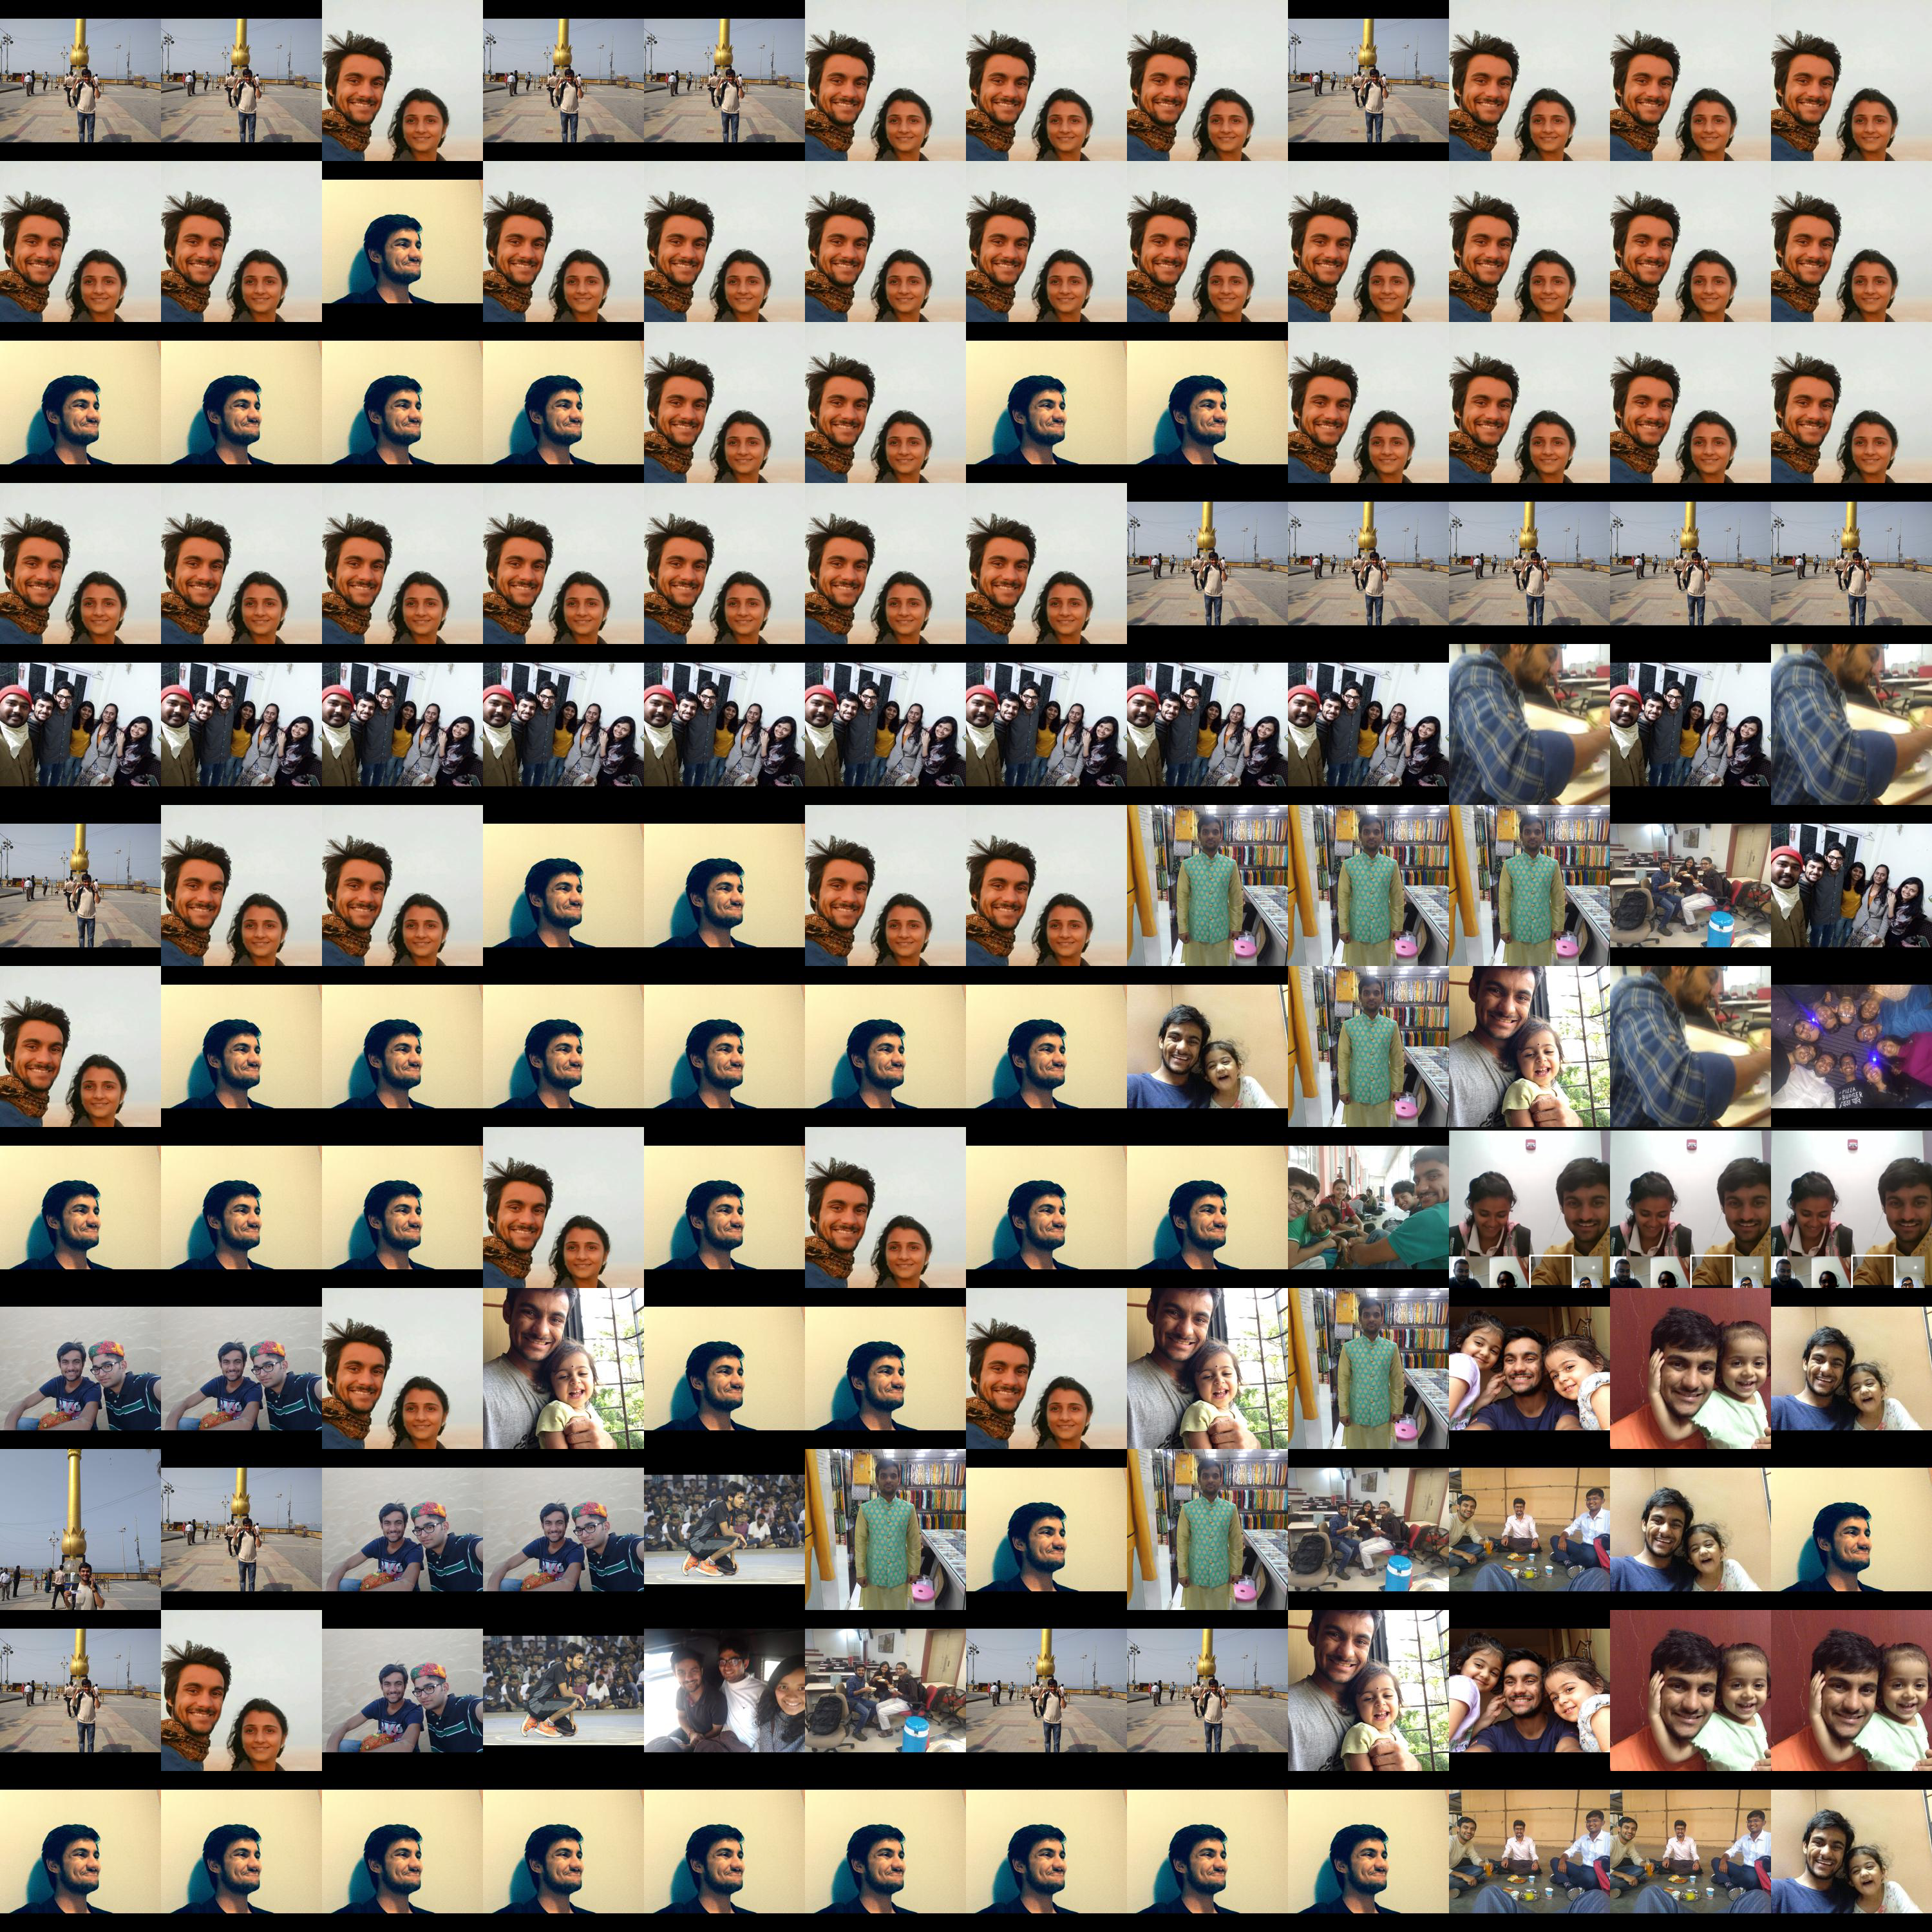

In [142]:
mosaic_pic

In [143]:
mosaic_pic.save("../../Photomosaic_Data/mosaic_2.jpg")